$$
\renewcommand{\vt}[1]{\boldsymbol{#1}}
\renewcommand{\uv}[1]{\hat{\boldsymbol{#1}}}
\renewcommand{\tv}[1]{\tilde{\boldsymbol{#1}}}
\renewcommand{\dvg}{\operatorname{div}}
\renewcommand{\grd}{\operatorname{grad}}
$$

# Integration of $R^n$ on triangles

We are interested in the computation of

\begin{equation}
\int_T R^n dy,
\end{equation}

where $T$ is a triangle, $R=|x-y|$, and $n = -3,-1,0,1,2,3,..$. This package is based on [1] and papers building on this paper, notably [2,3].

[[1]](http://ieeexplore.ieee.org/xpls/abs_all.jsp?arnumber=1143304&tag=1) D. Wilton, S. Rao, A. Glisson, D. Schaubert, O. Al-Bundak, and C. Butler, “Potential integrals for uniform and linear source distributions on polygonal and polyhedral domains,” IEEE Transactions on Antennas and Propagation, vol. 32, no. 3, pp. 276–281, Mar. 1984.

[2]R. D. Graglia, “On the numerical integration of the linear shape functions times the 3-D Green’s function or its gradient on a plane triangle,” IEEE Transactions on Antennas and Propagation, vol. 41, no. 10, pp. 1448–1455, Oct. 1993.

[3] P. Yla-Oijala and M. Taskinen, “Calculation of CFIE impedance matrix elements with RWG and n times;RWG functions,” IEEE Transactions on Antennas and Propagation, vol. 51, no. 8, pp. 1837–1846, Aug. 2003.


Following Wilton[1], we start with writing the integrand as the surface divergence of a radially symmetric vector function. Assume

\begin{equation}
R^n = \dvg_{y} \left( F(P;h) \vt{P} \right)
\end{equation}

Here, $\vt{P}$ is the projection onto the plane supporting $T$ of $\vt{y} - \vt{x}$, and $h$ is the signed normal coordinate of $\vt{x}-\vt{y}$, i.e. $\vt{x}-\vt{y} = h\uv{n} - \vt{P}$ (with $\vt{n}$ a normal on $T$ that will induce a counter-clockwise ordering of $\partial T$).

The Ansatz above is equivalent to:

\begin{equation}
\left(P^2+h^2\right)^{n/2} = F'(P;h) P + F(P;h) 2
\end{equation}

Multiplying with the integrating factor $P$ leads to

\begin{equation}
P \left(P^2+h^2\right)^{n/2} = \left( P^2 F(P;h) \right)'
\end{equation}

or,

\begin{align}
F(P;h) =& \frac{1}{P^2} \int Q \left(Q^2+h^2\right)^{n/2} dQ \\
=& \frac{1}{P^2} \frac{1}{(n+2)}  \left( P^2 + h^2 \right)^{\frac{n+2}{2}}
\end{align}

and finally

\begin{equation}
R^n = \dvg \left( \frac{1}{P^2} \frac{1}{(n+2)} \left( P^2 + h^2 \right)^{\frac{n+2}{2}} \vt{P} \right)
\end{equation}

## Computation by Recursion

Using this the integral we want to compute reduces to:

\begin{equation}
\lim_{\epsilon \rightarrow 0} \frac{1}{n+2} \int_{\partial(T \setminus B_{\epsilon})} \frac{ \left( P^2 + h^2 \right)^{\frac{n+2}{2}}}{P^2} \uv{m} \cdot \vt{P} dy - \frac{1}{n+2} \lim_{\epsilon \rightarrow 0} \int_{C_{\epsilon}} \frac{ \left( P^2 + h^2 \right)^{\frac{n+2}{2}}}{P^2} \uv{m} \cdot \vt{P} dy
\end{equation}

The integration path of the contour in the second term is $\partial (B_{\epsilon}(\xi) \cap T)$. For $\xi \notin T$ the contour is void, for $\xi \in T$ it is a circle, for $\xi$ in the interior of one of the sides comprising $\partial T$ it is half a circle, and for $\xi$ in the vertices of $T$ it is a circle spanning the angle formed at those vertices w.r.t the interior of $T$. If $\xi \in \partial T$, the integral in the first term is meant in the Cauchy principle value sense.

The second term is a contribution of a small circlular area of radius $\epsilon$ centered on $\xi$. This region needs to be excluded prior to applying the surfacic divergence theorem because the potential is not smooth there. It can easily be evaluated to

\begin{align}
S_n =& - \frac{1}{n+2} \lim_{\epsilon \rightarrow 0} \int_{C_{\epsilon}} \frac{ \left( P^2 + h^2 \right)^{\frac{n+2}{2}}}{P^2} \uv{m} \cdot \vt{P} dy \\
=& -\frac{\alpha}{n+2} |h|^{n+2}
\end{align}

The boundary of the triangle is the disjoint union of the three segments: $\partial T = \cup_{i=1}^3 \partial_i T$. On $\partial_i T$, $\uv{m} \cdot \vt{P}$ takes on the constant value denoted $p_i$ (the sign of $p_i$ depends on the position of $\vt{\xi}$ with respect to the oriented line $\partial_i T$). The segment $\partial_i T$ is parametrised by

\begin{equation}
\partial_i T(s) = \vt{y}_{0,i} + s \uv{t}_i, \quad s \in [a_i,b_i]
\end{equation}

where $\vt{y}_{0,i}$ is the orthogonal projection of $\vt{x}$ on $\partial T_i$, and $\uv{t}_i$ is the unit vector along $\partial_i T$.

The integral reduces to:

\begin{equation}
\frac{1}{n+2} \sum_{i=1}^3 p_i \int_{a_i}^{b_i} \frac{\left(s^2 + p_i^2 + h^2\right)^{\frac{n+2}{2}}}{s^2 + p_i^2} ds
\end{equation}

Let us now focus on a single term:

\begin{equation}
I_n = \frac{p}{n+2} \int_{a}^{b} \frac{(s^2+p^2+h^2)^{\frac{n+2}{2}}}{s^2+p^2} ds
\end{equation}

where indices $i$ where omitted.

For $n = -3$ we get

\begin{align}
I_{-3} =& -p \int_{a}^{b} \frac{(s^2+p^2+h^2)^{-\frac{1}{2}}}{s^2+p^2} ds \\
=& -\frac{1}{h} \tan^{-1} \frac{hs}{p \sqrt{s^2+p^2+h^2}}
\end{align}

*Note*: Here we used the dare I say non-trivial primitve:

\begin{equation}
\int \frac{ab}{\left( s^2 + a^2 \right) \sqrt{s^2 + a^2 + b^2}} = \tan^{-1} \frac{bs}{a \sqrt{s^2 + a^2 + b^2}}
\end{equation}

See e.g. [Wolfram Alpha](https://www.wolframalpha.com/input/?i=diff%28atan%28b*s%2F%28a*sqrt%28s%5E2%2Ba%5E2%2Bb%5E2%29%29%29,s%29).


For n = 0 the integral becomes

\begin{align}
I_0 =& \frac{1}{2} p \int_a^b \frac{s^2+p^2+h^2}{s^2+p^2} ds \\
=& \frac{1}{2} p \left( s + \frac{h^2}{p} \tan^{-1} \frac{s}{p} \right)
\end{align}

In the case $n > 0$ the integrals can be computed by recursion.

\begin{align}
I_n =& \frac{p}{n+2} \int \frac{(s^2+p^2+h^2)^{\frac{n+2}{2}}}{s^2+p^2} ds \\
=& \frac{p}{n+2} \int \frac{(s^2+p^2+h^2)^{n/2}\left(s^2+p^2+h^2\right)}{s^2+p^2} ds \\
=& \frac{p}{n+2} \left( \int \left( s^2+p^2+h^2 \right)^{n/2} ds + h^2 \frac{n}{p} I_{n-2}\right) \\
=& \frac{p}{n+2} J_n(s) + h^2 \frac{n}{n+2} I_{n-2} \\
\end{align}

The first term can be computed by recursion. Consider the sequence of integrals:

\begin{align}
L_n =& \int \left( t^2 + 1 \right)^{n/2} dt \\
=& \int \cosh^{n+1} (\alpha) d\alpha \quad \mbox{where } t = \sinh \alpha \\
=& \cosh^n \alpha \sinh \alpha - n \int \cosh^{n-1} \alpha \sinh^2 \alpha \\
=& \left(1 + t^2\right)^{\frac{n}{2}} t - n \int \cosh^{n-1} \alpha (\cosh^2 \alpha - 1) \\
=& \left(1 + t^2\right)^{\frac{n}{2}} t - n \left( L_n - L_{n-2} \right)
\end{align}

From which

\begin{equation}
L_n = \frac{1}{n+1} \left( \left(1 + t^2\right)^{\frac{n}{2}} t + n J_{n-2} \right)
\end{equation}

The recursion is bootstrapped from

\begin{equation}
L_{-1} = \log \left( t + \sqrt{1 + t^2} \right)
\end{equation}

And so we get for the sequence $J_n$:

\begin{align}
J_{n}(s) =& \int \left( s^2 + p^2 + h^2 \right)^{\frac{n}{2}} ds \\
=& \left( p^2 + h^2 \right)^{\frac{n+1}{2}} \int (t^2+1)^{n/2} dt, \quad t = \frac{s}{\sqrt{p^2+h^2}} \\
=& \left( p^2 + h^2 \right)^{\frac{n+1}{2}} L_n(t) \\
=& \frac{1}{n+1} \left( p^2 + h^2 \right)^{\frac{n+1}{2}} \left( \left(1 + t^2\right)^{\frac{n}{2}} t + n L_{n-2} \right) \\
=& \frac{1}{n+1} \left( s \left( s^2 + p^2 + h^2 \right)^{\frac{n}{2}} + n (p^2+h^2) J_{n-2}(s) \right)
\end{align}

bootstrapped by

\begin{equation}
J_{-1}(s) = \log \left( s + \sqrt{s^2 + p^2 + h^2} \right)
\end{equation}

This recursion was already mentioned in [3].

In the case where $p=0$ and $h=0$ we will use the limiting value

\begin{equation}
\left. J_{-1}(s) \right|_a^b = \lim_{\epsilon \rightarrow 0} \log \left( \frac{b+\sqrt{b^2+\epsilon^2}}{a + \sqrt{a^2 +\epsilon^2}} \right) = \left\{ \begin{array}{cl}
\log \left( \frac{b}{a} \right), & \mbox{when } b > 0 \\
\log \left( \frac{a}{b} \right), & \mbox{when } b < 0 \\
\end{array} \right.
\end{equation}

*note*: The limit is only finite if $a$ and $b$ have the same sign. This is guaranteed because the singularity $\vt{x}$ is not allowed to be on the boundary (even though it is allowed to be on the extension of these segments).

The first recursion gives the integral for $n = -1$, i.e. one of the values computed in [1]:

\begin{align}
I_{-1} =& p \int_{a}^{b} \frac{(s^2+p^2+h^2)^{1/2}}{s^2+p^2} ds \\
=& p \int_{a}^{b} \left( \frac{1}{\sqrt{s^2+p^2+h^2}} + \frac{h^2}{\sqrt{s^2+p^2+h^2}(s^2+p^2)} \right) ds \\
=& p \left. \log (s + \sqrt{s^2+p^2+h^2}) \right|_a^b + h \left. \tan^{-1} \frac{hs}{p \sqrt{s^2+p^2+h^2}} \right|_a^b
\end{align}


### Combining the contour and singularity contributions

For small $p$, the argument of $\tan^{-1}$ becomes very large. Moreover, the contributions stemming from the integral over $\partial T$ and those stemming from the region around $\xi$ cancel in the final computation of $\sum_i I_{n,i} + S_n$.

In [1] it is suggested to combine both contributions using the addition property of the $\tan^{-1}$. In this section this will be generalised for arbitrary powers of $R$. Not only will this result in the stable computation of the integrals, it will also eliminate branches from the code.

Using the computations from previous section we have

\begin{align}
\int \frac{h}{R^3} =& - \sum_{i=1}^3 \left. \tan^{-1} \frac{hs}{p_i \sqrt{s^2+p_i^2+h^2}} \right|_{a_i}^{b_i} + \alpha \sigma(h) \\
=& - \sigma(h) \left( \sum_{i=1}^3 \left. \tan^{-1} \frac{|h|s}{p_i \sqrt{s^2+p_i^2+h^2}} \right|_{a_i}^{b_i} - \alpha \right) \\
\end{align}

The interior angle spanned by $\partial T$ as seen by $\xi$ can be written as:

\begin{equation}
a = \sum_{i=1}^3 \left. \tan^{-1} \frac{s}{p_i} \right|_{a_i}^{b_i}
\end{equation}

The [addition theorem](https://en.wikipedia.org/wiki/Inverse_trigonometric_functions#Arctangent_addition_formula) for $\tan^{-1}$ applied to this situtation allows to combine corresponding terms from $\sum_i I_{n,i}$ and $S_n$:

\begin{equation}
\tan^{-1} \frac{s}{p_i} - \tan^{-1} \frac{|h|s}{p_i \sqrt{s^2+p_i^2+h^2}} = \tan^{-1} \frac{p_i s}{(p_i^2 + h^2) + |h| \sqrt{s^2+p_i^2+h^2}}
\end{equation}

Note that

\begin{equation}
S_n = h^2 \frac{n}{n+2} S_{n-2}
\end{equation}

and comparing this with the second term in the recursion for $I_n$ ($n$ odd):

\begin{equation}
I_{n,i} = ... + h^2 \frac{n}{n+2} I_{n-2,i}
\end{equation}

tells us that once the merging of the two contributions is done for $n=-3$, the recursion will generate the correct answers for all other powers of $R$.

Whenever $p=0$, the $\tan^{-1}$ will be set to zero. Not only will this result in more efficient code in that case, it will also void division by zero when in addition also $h=0$.

For $n = 0$ the situation is even better:

\begin{align}
I_{0} =& \frac{1}{2} \sum_{i=1}^{3} \left( p_i \left. s \right|_{a_i}^{b_i} + h^2 \left. \tan^{-1} \frac{s}{p} \right|_{a_i}^{b_i} \right) -\frac{1}{2} h^2 \alpha \\
=& \frac{1}{2} \sum_{i=1}^{3} p_i \left. s \right|_{a_i}^{b_i}
\end{align}

Again because the second term in the recursion for $I_n$ and the recursion for the singularity contribution behave identically, the $\tan^{-1}$ will cancel  in the computation of integrals of all powers of $R$.

## The vector case

In this section we will compute integrals of the form

\begin{equation}
\int \frac{\vt{y} - \vt{\xi}}{R^n} dy, \quad n=-3,-1,0,1,2,...
\end{equation}

In this case we will look for scalar potentials such that their surfacic gradient is the above integrand:

\begin{equation}
\frac{\vt{y} - \vt{\xi}}{R^n} = \grd_T F(P;h)
\end{equation}

or

\begin{equation}
\frac{1}{P} F'(P;h) \vt{P} = \left( P^2 + h^2 \right)^{n/2} \vt{P}
\end{equation}

from which

\begin{align}
F(p) =& \int \left(P^2 + h^2 \right)^{n/2} dP \\
=& \frac{1}{2} \int_{Q = P^2+h^2} Q^{n/2} dQ \\
=& \frac{1}{n+2} \left( P^2 + h^2 \right)^{\frac{n+2}{2}}.
\end{align}

So we conclude

\begin{equation}
R^{n} = \grd_T \left( \frac{1}{n+2} \left( P^2 + h^2 \right)^{\frac{n+2}{2}} \right)
\end{equation}

The integral we are looking for thus can be written as

\begin{align}
\int_T \frac{\vt{y} - \vt{\xi}}{R^n} dy =& \lim_{\epsilon \rightarrow 0} \left( \int_{\partial T \setminus B_{\epsilon}} \frac{\uv{m}}{n+2} \left( P^2 + h^2 \right)^{\frac{n+2}{2}} dy + \int_{T \cap C_{\epsilon}} \frac{\uv{m}}{n+2} \left( P^2 + h^2 \right)^{\frac{n+2}{2}} dy \right)
\end{align}

For $n \geq -1$ the second term clearly disappears when $\epsilon \rightarrow 0$. Also when $n=-3$ and $h \neq 0$ the singular contribution disappers. It is only the case where $n=-3$ and $h = 0$ that needs a more careful analysis of the second term. If $\xi \notin \partial T$, the integral vanishes because contributions on opposite sides of $\vt{\xi}$ cancel. When $\xi \in \partial T$ this is not necessarily the case. However, we can safely assume this case will never occur because in that case the integral $\int_T (\vt{y}-\vt{\xi}) R^{-3}$ diverges anyway.

In conclusion either the integral diverges or the second term is zero. We can focus or efforts on the first term.

Like we did for the scalar case, the integral can be written as

\begin{equation}
\int_T \frac{\vt{y} - \vt{\xi}}{R^n} dy = \sum_{i=1}^{3} \uv{m}_i \left. K_n(s,p_i,h) \right|_{a_i}^{b_i}
\end{equation}

with

\begin{equation}
K_n(s,p,h) = \frac{1}{n+2} \int_a^b \left( s^2 + p^2 + h^2 \right)^{\frac{n+2}{2}} = \frac{1}{n+2} J_{n+2}\left(s,p,h\right)
\end{equation}

which can be easily expressed in terms of quantities we already encountered in our previous caluclations. In other words computation of the vector integrals comes at almost no computational overhead.

## Extension to Triangle/Disk intersections

In the Space-Time Galerkin discretisation of time domain retarded potential boundary integral equations, the computation of integrals over the following class of domains is required:

\begin{equation}
D = T \cap B(\xi,Q)
\end{equation}

where $T$ is a triangle and $B(\xi,Q)$ is the disk with centre $\xi$ (assumed to lie in the plane supporting $T$) and radius $Q$.

When given a triangle by its three vertices and a disk by its center and radius, the construction of a boundary representation of such a domain is nothing short of a nightmare, and will not be discussed in this document.


We start from the alternative surfacic potential representation for the kernel:

\begin{equation}
R^n = \dvg \left( \frac{1}{(n+2) P^2} \left( \left( P^2 + h^2 \right)^{\frac{n+2}{2}} - \left(h^2 \right)^{\frac{n+2}{2}} \right) \vt{P} \right)
\end{equation}

Note that the term we added has vanishing divergence and thus will not affect the value of the integral. The reason for this alternative potential is that it is regular at $P=0$ and so we do not have to keep track of the singularity term separately.


The boundary $\partial D$ is made up from straight segments and arcs. Integration of the potential along the straight segments is dealt with as explained in the previous sections. For an arc $C$ the contribution to the integral looks like:

\begin{align}
A_n =& \frac{1}{n+2} \int_{C} \frac{\left( P^2 + h^2 \right)^{\frac{n+2}{2}} - \left( h^2 \right)^{\frac{n+2}{2}}}{P^2} \uv{m} \cdot \vt{P} dy \\
=& \frac{\alpha}{n+2} \left( \left( p^2 + h^2 \right)^{\frac{n+2}{2}} - \left(h^2\right)^{\frac{n+2}{2}} \right)
\end{align}

where $\alpha$ is the signed angle spanned by the arc (positive for arcs traversed in counterclockwise sense, negative otherwise). From this expression we get the following recursion:

\begin{equation}
A_n = \frac{\alpha}{n+2} \left[ \left( \frac{n}{\alpha} A_{n-2} + \left( h^2 \right)^{\frac{n}{2}} \right) \left( p^2 + h^2 \right) - \left( h^2 \right)^{\frac{n+2}{2}} \right]
\end{equation}

Bootstrapped by

\begin{align}
A_{-3} =& -\alpha \left( \left( p^2 + h^2 \right)^{-\frac{1}{2}} - \left( h^2 \right)^{-\frac{1}{2}} \right) \\
A_{0} =& \frac{\alpha}{2} p^2
\end{align}

For the vector case the contribution from a single arc reads

\begin{align}
B_n =& \int_C \uv{m} \left( \frac{1}{n+2} \left( P^2 + h^2 \right)^{\frac{n+2}{2}} \right) dy \\
=& \frac{1}{n+2} \left( p^2 + h^2 \right)^{\frac{n+2}{2}} \int_C \uv{m} dy
\end{align}

*Note*: In the vector case we need to be consistent in our choice for the potential $\Phi$ since the quantity we integrate over is $\uv{m} \Phi$ which does not necessarily cancel at the inter-sector boundary. In contrast, for the scalar case, the quantity $\uv{m} \cdot (F(P) \vt{P})$ vanishes along the inter-sector boundary and does $F(P)$ can be chosen freely in each sector. So if we would leave out the second term in the surfacic potential, we would have to do so also in the computation of the segment contributions, forcing us to consider what happens in the neighborhood of $\xi$. For certain configurations of $D$ this point might not even be in the integration domain. The resulting algorithm becomes inelegant and prone to numerical and logical errors.

*Note*: for contributions of arcs and circles we can assume that $p \neq 0$. This ensures for example that no divisions by zero occur in the computation of $h A_{-3}$

*Note* In the case of a full circle $\alpha = \pm 2\pi$, $B_n$ vanishes.

In [1]:
using WiltonInts84
using FixedSizeArrays

In [2]:
using PyPlot

In [3]:
p1 = Vec(0.0, 0.0, 0.0)
p2 = Vec(1.0, 0.0, 0.0)
p3 = Vec(0.0, 1.0, 0.0)
h = 0.1

0.1

In [4]:
x = -0.5 : 0.01 : 1.5
y = -0.5 : 0.01 : 1.5

-0.5:0.01:1.5

In [5]:
t, T = 0.15, 1
r, R = max(0,t-T), max(0,t)

(0.0,0.15)

In [8]:
M = zeros(typeof(t), length(x), length(y))
for i in eachindex(x)
    for j in eachindex(y)
        c = Vec(x[i],y[j],h)
        try
            I, K = wiltonints(p1,p2,p3,c,r,R,Val{0})
            M[i,j] = I[2]
        catch
            #@show i j
            #@show c
        end
    end
end

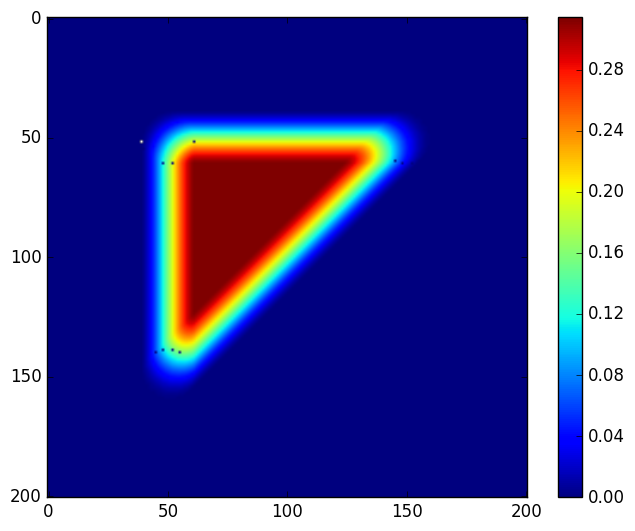

PyObject <matplotlib.colorbar.Colorbar object at 0x00000000296C6A58>

In [7]:
imshow(M); colorbar()

The contour computation is not 100% robust at this time. In practice this is not a serious issue, since the coordinates of $\vt{x}$ depend on the location of the e.g. Gauss-Legendre quadrature points used for the testing integration in the variational method this toolbox is meant for. These coordinates are *weird* numbers as in highly unlikely to hit the geometric rountine's boundary cases.